# Random Survival Forest

Customer churn/attrition, a.k.a the percentage of customers that stop using paying 
services,
is one of the most important metrics for a business, as it usually costs more to acquire new customers than it does to retain existing ones. Indeed, according to a study by Bain & Company, existing customers tend to buy more from a company over time, thus reducing the operating costs of the business and may refer the products they use to others. For example, in financial services, a 5% increase in customer retention produces more than a 25% increase in profit. By using Survival Analysis, not only companies can predict if customers are likely to stop doing business but also when that event might happen.

## Methods

In this study, we adopt random survival forests which have never been used in understanding 
factors affecting membership in a sport club using existing data in a Sport Club. 
The analysis is based on the use of random survival forests in the presence of covariates 
that do not necessarily satisfy the PH assumption. 
Random Survival Forests does not make the proportional hazards assumption (Ehrlinger, 2016) 
and has the flexibility to model survivor curves that are of dissimilar shapes for 
contrastinggroups of subjects. Random Survival Forest is an extension of Random Forest 
allowing efficient non-parametric analysis of time to event data (Breiman, 2001). 
This characteristcs allow us to surpass the Cox Regression limitation of the proportional hazard
assumption, requiring to exclude variables which not fullfill the model assumption. 
It was shown by (Breiman, 2001) that ensemble learning can be further improved by injecting 
randomization into the base learning process - a method called Random Forests.  
The random survival forest was developed using the package PySurvival (Fotso & Others, 2019)
The most relevant variables predicting the dropout are analysed using the log-rank test. 
The metric variables are transformed to categorical using the quartiles to provide a statistical
comparison of groups. 
The survival analysis was conducted using the package Lifelines (Davidson-Pilon et al., 2017).

## Results
The initial model has a c-index of 0.92. After removing estadoCivil_outro and ano c-index improved to 0.94. Without idade improved to 0.95. 
The most relevant variables predicting the dropout are:
- mesesUP
- valorTotal
- anoUltimoPagamento
- quotaMensal
- escaloesTotalJogos_ate 1
- jogosEpoca
- escaloesTotalJogos_56 a 105
- estadoCivil_solteiro
- escaloesTotalJogos_21 a 56
- escaloesTotalJogos_mais 105
- sexo_M
- estadoCivil_nao definido

TODO: COLOCAR ESTA DESCRIÇÃO PARA TODAS AS VARIÁVEIS:
There were identified significative differences between the gender groups (χ2=194.63, p < .005), wrenew two or more contracts, the survival probability for 12 months is 85.49%

## Methods bibliography
- Ehrlinger, J. (2016). ggRandomForests: Exploring Random Forest Survival. ArXiv:1612.08974 [Stat]. http://arxiv.org/abs/1612.08974
- Breiman, L. (2001). Random Forests. Machine Learning, 45(1), 5–32. https://doi.org/10/d8zjwq
- Fotso, S., & others. (2019). PySurvival: Open source package for Survival Analysis modeling. https://www.pysurvival.io/

# Dataset
Considering the sport club policies all the customers with payments less than 24 months where considered active:  
- dt['abandonou'] = 0
- dt.loc[dt['mesesUP']>=24,'abandonou']=1

The variables extracted from the software correspond to the time interval of becoming a customer until the end of observation (censoring on 31 Maio 2019) or the end of the customer relationship (dropout). The survival time in the dataset is represented by the number of years the customer begin affilated.

We extracted records of 25316 customers (male n=17246, female n=8070) from a sport club; data corresponded to the time period between October 1, 1944 and May 31, 2019. 

In [3]:
from IPython.display import HTML
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import datetime
import seaborn as sns

df = pd.read_excel('../data/dadosSociosTratados.xlsx',index_col=0)

## Description

Variáveis:

- ano: ano inscrição sócio
- idade: numérica
- sexo: M ou F
- estadoCivil: solteiro, não definido, casado, outro
- quotaMensal: valor da quota mensal
- ultimPagamento: Quando é que foi realizado o último pagamento
- valorTotal: Valor total pago
- totalJogos: Total de Jogos que o sócio foi
- jogosEpoca: Jogos vistos na última época
- mesesUP: Quantos meses desde o último pagamento
- anosSocio: Há quantos anos é sócio
- idaEstágio: Vai ou não ao estádio
- abandonou: 1 não é sócio, 0 é sócio censura

Ei is the event indicator such that Ei=1, if an event happens and Ei=0 in case of censoring

As variáveis categóricas foram transformadas em dummies:
- sexo
- estadoCivil
- escaloesTotalJogos


In [4]:
df.sexo.value_counts()

M    17246
F     8070
Name: sexo, dtype: int64

In [5]:
df.describe()

,ano,idade,quotaMensal,valorTotal,totalJogos,jogosEpoca,diasUltimoPagamento,mesesUP,abandonou,anosSocio,idaEstadio,mes
count,25316.000000,25316.000000,25316.000000,25316.000000,25316.000000,25316.000000,25316.000000,25316.000000,25316.000000,25316.000000,25316.000000,25316.000000
mean,2007.048033,27.262996,4.356099,316.037984,26.535946,2.171631,586.277033,18.814110,0.221638,11.264339,0.401367,6.875454
std,10.937818,20.087078,3.550837,493.971528,45.812996,4.076356,990.398069,32.498248,0.415357,10.908777,0.490185,3.391117
min,1944.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2004.000000,13.000000,1.000000,5.000000,0.000000,0.000000,83.994934,2.000000,0.000000,5.000000,0.000000,4.000000
50%,2010.000000,19.000000,2.500000,53.000000,0.000000,0.000000,122.113031,4.000000,0.000000,8.000000,0.000000,8.000000
75%,2014.000000,41.000000,6.000000,448.250000,36.000000,2.000000,534.982420,17.000000,0.000000,14.000000,1.000000,9.000000
max,2019.000000,118.000000,10.000000,2602.000000,197.000000,16.000000,4778.034828,156.000000,1.000000,74.000000,1.000000,12.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25316 entries, 1 to 25316
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   nome                 25316 non-null  object        
 1   dataAdesao           25316 non-null  datetime64[ns]
 2   ano                  25316 non-null  int64         
 3   contribuinte         25316 non-null  object        
 4   dataNascimento       25316 non-null  object        
 5   idade                25316 non-null  int64         
 6   sexo                 25316 non-null  object        
 7   estadoCivil          25316 non-null  object        
 8   categoria            25316 non-null  object        
 9   quotaMensal          25316 non-null  float64       
 10  profissao            25316 non-null  object        
 11  codPostal            25316 non-null  object        
 12  ultimaQuota          25316 non-null  object        
 13  ultimoPagamento      25316 non-

In [7]:
df.head()

,nome,dataAdesao,ano,contribuinte,dataNascimento,idade,sexo,estadoCivil,categoria,quotaMensal,...,valorTotal,totalJogos,jogosEpoca,diasUltimoPagamento,mesesUP,abandonou,anosSocio,idaEstadio,escaloesTotalJogos,mes
Sócio,,,,,,,,,,,,,,,,,,,,,
1,DURVAL MANUEL BELO MOREIRA,1944-10-01,1944,105910465,1935-05-11 00:00:00,83,M,casado,homem,10.0,...,1906.0,0,0,103.308984,3,0,74,0,ate 1,10
2,ANTONIO ALBINO BELO MOREIRA,1944-10-01,1944,152586199,1930-09-29 00:00:00,88,M,solteiro,homem,10.0,...,1906.0,0,0,113.056309,3,0,74,0,ate 1,10
3,MARIO GONCALVES BRAGA,1945-08-24,1945,999999990,1945-08-24 00:00:00,73,M,nao definido,homem,10.0,...,1553.0,0,0,1100.031203,36,1,73,0,ate 1,8
4,MANUEL BATISTA CERQUEIRA,1945-09-01,1945,124938060,1921-05-27 00:00:00,97,M,casado,reformado,5.0,...,790.0,0,0,264.945987,8,0,73,0,ate 1,9
5,JOAQUIM MANUEL FERREIRA,1945-09-01,1945,108239110,1921-03-08 00:00:00,97,M,outro,homem,10.0,...,1466.0,0,0,1089.943393,35,1,73,0,ate 1,9


In [8]:
df.tail()

,nome,dataAdesao,ano,contribuinte,dataNascimento,idade,sexo,estadoCivil,categoria,quotaMensal,...,valorTotal,totalJogos,jogosEpoca,diasUltimoPagamento,mesesUP,abandonou,anosSocio,idaEstadio,escaloesTotalJogos,mes
Sócio,,,,,,,,,,,,,,,,,,,,,
25312,MICAEL YTWEVA MASSANO MOREIRA,2019-02-21,2019,286625296,2011-04-14 00:00:00,7,M,solteiro,sub14,1.0,...,17.0,0,0,72.296706,2,0,0,0,ate 1,2
25313,GONÇALO MARIA FERR. SENDIM POLIDO PIRES,2019-02-21,2019,275230511,2010-05-26 00:00:00,8,M,solteiro,atleta,1.0,...,12.0,0,0,72.269791,2,0,0,0,ate 1,2
25314,TOMAS MIGUEL SOARES RIBEIRO,2019-02-21,2019,290670578,2016-11-24 00:00:00,2,M,solteiro,sub14,1.0,...,17.0,0,0,72.095076,2,0,0,0,ate 1,2
25315,MIGUEL MARIA REBELO CORSINO DA SILVA,2019-02-21,2019,259420697,2004-06-30 00:00:00,14,M,solteiro,sub14,1.0,...,17.0,0,0,71.969059,2,0,0,0,ate 1,2
25316,JOAO MANUEL JESUS VIDAL,2019-02-21,2019,257110887,1990-05-23 00:00:00,28,M,solteiro,homem,10.0,...,0.0,0,0,71.966639,2,0,0,0,ate 1,2


In [9]:
df['ultimoPagamento'] = pd.to_datetime(df['ultimoPagamento'],format='%Y-%m-%d %H:%M', errors='coerce')

In [10]:
df['anoUltimoPagamento']=df['ultimoPagamento'].apply(lambda x: x.year)

In [11]:
df.anoUltimoPagamento.unique()

array([2019., 2016., 2018., 2015., 2017., 2014., 2008.,   nan, 2009.,
       2007., 2010., 2011., 2012., 2013., 2006.])

In [12]:
df.anoUltimoPagamento=df.anoUltimoPagamento.fillna(0)

In [13]:
df['anoUltimoPagamento']=df.anoUltimoPagamento.astype(int)

In [14]:
df.drop(columns=['nome','dataAdesao','ultimoPagamento','contribuinte','dataNascimento','mes','profissao',
                 'codPostal','categoria','ultimaQuota','diasUltimoPagamento'],inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25316 entries, 1 to 25316
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ano                 25316 non-null  int64  
 1   idade               25316 non-null  int64  
 2   sexo                25316 non-null  object 
 3   estadoCivil         25316 non-null  object 
 4   quotaMensal         25316 non-null  float64
 5   valorTotal          25316 non-null  float64
 6   totalJogos          25316 non-null  int64  
 7   jogosEpoca          25316 non-null  int64  
 8   mesesUP             25316 non-null  int64  
 9   abandonou           25316 non-null  int64  
 10  anosSocio           25316 non-null  int64  
 11  idaEstadio          25316 non-null  int64  
 12  escaloesTotalJogos  25316 non-null  object 
 13  anoUltimoPagamento  25316 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 2.9+ MB


In [16]:
df.estadoCivil.value_counts()

solteiro        12065
nao definido     7667
casado           5085
outro             499
Name: estadoCivil, dtype: int64

Variáveis:

- ano: ano inscrição sócio
- idade
- sexo
- estadoCivil: solteiro, não definido, casado, outro
- quotaMensal: valor da quota mensal
- ultimPagamento: Quando é que foi realizado o último pagamento
- valorTotal: Valor total pago
- totalJogos: Total de Jogos que o sócio foi
- jogosEpoca: Jogos vistos na última época
- mesesUP: Quantos meses desde o último pagamento
- anosSocio: Há quantos anos é sócio
- idaEstágio: Vai ou não ao estádio
- abandonou: 1 não é sócio, 0 é sócio censura

Ei is the event indicator such that Ei=1, if an event happens and Ei=0 in case of censoring

## Converting from categorical to numerical

There are several categorical features that need to be encoded into one-hot vectors:

    sexo
    estadoCivil
    escaloesTotalJogos


In [17]:
dfCurvas = df.copy()
df = pd.get_dummies(df, columns=['sexo','estadoCivil','escaloesTotalJogos'],drop_first=True)

In [18]:
# Creating the time and event columns
time_column = 'anosSocio'
event_column = 'abandonou'

# Extracting the features
features = np.setdiff1d(df.columns, [time_column, event_column] ).tolist()

## Verificar null values e duplicates

In [19]:
# Checking for null values
N_null = sum(df[features].isnull().sum())
print("The raw_dataset contains {} null values".format(N_null)) #0 null values

The raw_dataset contains 0 null values


In [20]:
# Removing duplicates if there exist
N_dupli = sum(df.duplicated(keep='first'))
df = df.drop_duplicates(keep='first').reset_index(drop=True)
print("The raw_dataset contains {} duplicates".format(N_dupli))

# Number of samples in the dataset
N = df.shape[0]

The raw_dataset contains 4928 duplicates


# Exploratory Data Analysis


In [21]:
df.columns

Index(['ano', 'idade', 'quotaMensal', 'valorTotal', 'totalJogos', 'jogosEpoca',
       'mesesUP', 'abandonou', 'anosSocio', 'idaEstadio', 'anoUltimoPagamento',
       'sexo_M', 'estadoCivil_nao definido', 'estadoCivil_outro',
       'estadoCivil_solteiro', 'escaloesTotalJogos_21 a 56',
       'escaloesTotalJogos_56 a 105', 'escaloesTotalJogos_ate 1',
       'escaloesTotalJogos_mais 105'],
      dtype='object')

In [22]:
from pysurvival.utils.display import correlation_matrix
correlation_matrix(df[features], figure_size=(10,10), text_fontsize=8)

ModuleNotFoundError: No module named 'pysurvival'

Vamos remover as variáveis com correlações maiores

In [20]:
to_remove = ['totalJogos', 'idaEstadio']
features = np.setdiff1d(features, to_remove).tolist()

# Modeling

So as to perform cross-validation later on and assess the performances of the model, let's split the dataset into training and testing sets.

## Building the model

In [21]:
# Building training and testing sets
from sklearn.model_selection import train_test_split
index_train, index_test = train_test_split( range(N), test_size = 0.4)
data_train = df.loc[index_train].reset_index( drop = True )
data_test  = df.loc[index_test].reset_index( drop = True )

# Creating the X, T and E inputs
X_train, X_test = df[features], data_test[features]
T_train, T_test = df[time_column], data_test[time_column]
E_train, E_test = df[event_column], data_test[event_column]

In [22]:
#from pysurvival.models.survival_forest import ConditionalSurvivalForestModel
from pysurvival.models.survival_forest import RandomSurvivalForestModel
# Fitting the model
csf = RandomSurvivalForestModel(num_trees=200)
csf.fit(X_train, T_train, E_train, max_features='sqrt',
        max_depth=5, min_node_size=20)

RandomSurvivalForestModel

### Features importance

In [23]:
csf.variable_importance_table

,feature,importance,pct_importance
0,mesesUP,22.713589,0.292227
1,anoUltimoPagamento,11.201332,0.144114
2,valorTotal,9.403331,0.120981
3,jogosEpoca,7.417550,0.095432
4,quotaMensal,4.228938,0.054408
5,sexo_M,3.696899,0.047563
6,escaloesTotalJogos_56 a 105,3.195635,0.041114
7,escaloesTotalJogos_21 a 56,3.050713,0.039250
8,estadoCivil_solteiro,2.701795,0.034761
9,estadoCivil_nao definido,2.647630,0.034064


A negative number means that the model performs better without estadoCivil_Outro and ano:
https://stackoverflow.com/questions/27918320/what-does-negative-incmse-in-randomforest-package-mean

The variable mesesUP explains the survival 30%, year last payment 16.8%, totalAmount 12%, number of games 7.7%....


### Model performance

We are going to access the model performance using the training and test set. Previously defined.
 C-index close to 1, the model has an powerfull discriminatory; but if it is close to 0.5, it has no ability to discriminate between low and high risk subjects.

### C-index

In [24]:
from pysurvival.utils.metrics import concordance_index
c_index = concordance_index(csf, X_test, T_test, E_test)
print('C-index: {:.2f}'.format(c_index)) #0.83

C-index: 0.92


### Brier Score

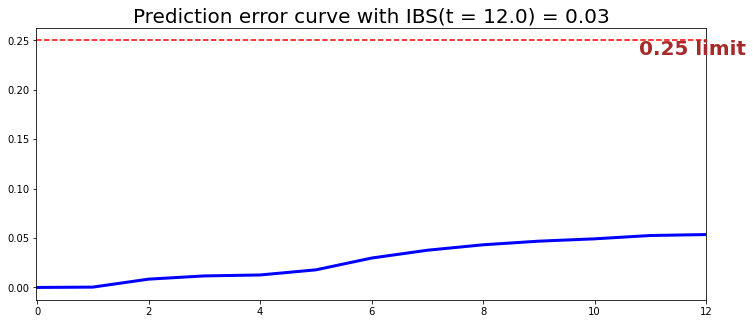

IBS: 0.03


In [25]:
from pysurvival.utils.display import integrated_brier_score
ibs = integrated_brier_score(csf, X_test, T_test, E_test, t_max=12,
    figure_size=(12,5))
print('IBS: {:.2f}'.format(ibs))

The IBS is equal to 0.03 on the entire model time axis. This indicates that the model will have very good predictive abilities.

## Building model without estadoCivil_outro and ano

In [26]:
to_remove = ['estadoCivil_outro', 'ano']
features = np.setdiff1d(features, to_remove).tolist()

In [27]:
# Creating the X, T and E inputs
X_train, X_test = df[features], data_test[features]
T_train, T_test = df[time_column], data_test[time_column]
E_train, E_test = df[event_column], data_test[event_column]

In [28]:
csf = RandomSurvivalForestModel(num_trees=200)
csf.fit(X_train, T_train, E_train, max_features='sqrt',
        max_depth=5, min_node_size=20)

RandomSurvivalForestModel

### Features importance

In [29]:
csf.variable_importance_table

,feature,importance,pct_importance
0,mesesUP,27.604057,0.307406
1,anoUltimoPagamento,11.962381,0.133216
2,valorTotal,10.921159,0.121621
3,jogosEpoca,7.263329,0.080886
4,quotaMensal,5.874218,0.065417
5,escaloesTotalJogos_ate 1,5.605068,0.062420
6,estadoCivil_solteiro,5.002168,0.055706
7,escaloesTotalJogos_56 a 105,3.733182,0.041574
8,escaloesTotalJogos_21 a 56,3.607328,0.040172
9,escaloesTotalJogos_mais 105,3.141763,0.034988


### Model performance

We are going to access the model performance using the training and test set. Previously defined.
 C-index close to 1, the model has an powerfull discriminatory; but if it is close to 0.5, it has no ability to discriminate between low and high risk subjects.

### C-index

In [30]:
from pysurvival.utils.metrics import concordance_index
c_index = concordance_index(csf, X_test, T_test, E_test)
print('C-index: {:.2f}'.format(c_index)) #0.83

C-index: 0.94


### Brier Score

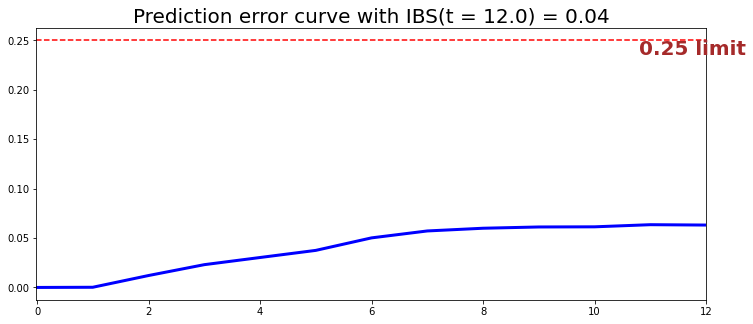

IBS: 0.04


In [31]:
from pysurvival.utils.display import integrated_brier_score
ibs = integrated_brier_score(csf, X_test, T_test, E_test, t_max=12,
    figure_size=(12,5))
print('IBS: {:.2f}'.format(ibs))

## Building model without idade

In [32]:
to_remove = ['idade']
features = np.setdiff1d(features, to_remove).tolist()

In [33]:
# Creating the X, T and E inputs
X_train, X_test = df[features], data_test[features]
T_train, T_test = df[time_column], data_test[time_column]
E_train, E_test = df[event_column], data_test[event_column]

In [34]:
csf = RandomSurvivalForestModel(num_trees=200)
csf.fit(X_train, T_train, E_train, max_features='sqrt',
        max_depth=5, min_node_size=20)

RandomSurvivalForestModel

### Features importance

In [35]:
csf.variable_importance_table

,feature,importance,pct_importance
0,mesesUP,27.280415,0.278855
1,valorTotal,12.116921,0.123857
2,anoUltimoPagamento,11.954303,0.122195
3,quotaMensal,10.489022,0.107217
4,jogosEpoca,6.295722,0.064354
5,estadoCivil_solteiro,5.604325,0.057286
6,escaloesTotalJogos_ate 1,4.967042,0.050772
7,escaloesTotalJogos_56 a 105,4.889961,0.049984
8,escaloesTotalJogos_21 a 56,4.859300,0.049671
9,sexo_M,4.437461,0.045359


### Model performance

We are going to access the model performance using the training and test set. Previously defined.
 C-index close to 1, the model has an powerfull discriminatory; but if it is close to 0.5, it has no ability to discriminate between low and high risk subjects.

### C-index

In [36]:
from pysurvival.utils.metrics import concordance_index
c_index = concordance_index(csf, X_test, T_test, E_test)
print('C-index: {:.2f}'.format(c_index)) #0.83

C-index: 0.95


### Brier Score

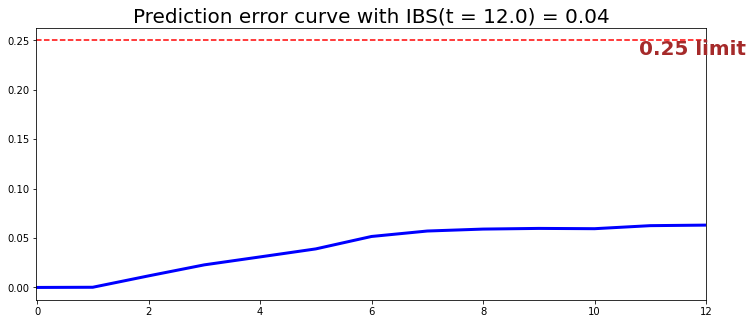

IBS: 0.04


In [37]:
from pysurvival.utils.display import integrated_brier_score
ibs = integrated_brier_score(csf, X_test, T_test, E_test, t_max=12,
    figure_size=(12,5))
print('IBS: {:.2f}'.format(ibs))

# Predictions
Lets compare the timeseries of actual and predicted customers who leave for each time t.

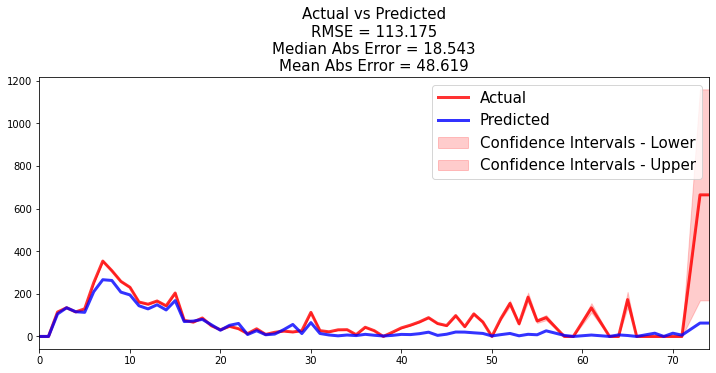

In [38]:
from pysurvival.utils.display import compare_to_actual
results = compare_to_actual(csf, X_test, T_test, E_test, is_at_risk = False,  
figure_size=(12, 5), metrics = ['rmse', 'mean', 'median'])

The model only makes an average absolute error of ~33 customers.

## Individual predictions
Compute the probability of remaining a customer for all times t

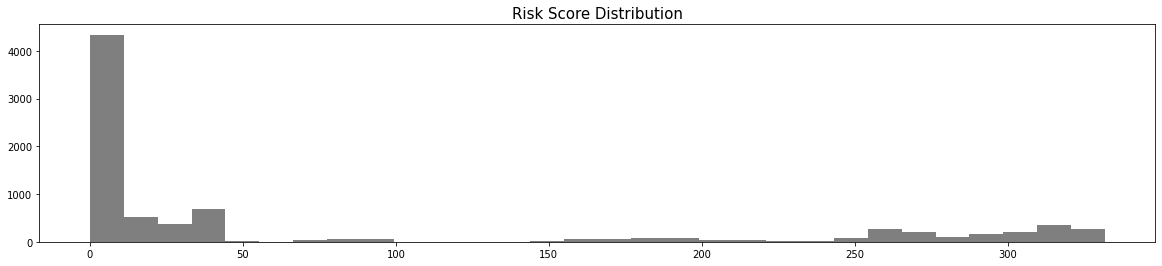

In [39]:
from pysurvival.utils.display import create_risk_groups

risk_groups = create_risk_groups(model=csf, X=X_test,
    use_log = False, num_bins=30, figure_size=(20, 4))

# Curvas de sobrevivência

In [40]:
def curvaSobrevivencia(dados,coluna):
    ax = plt.subplot(111)
    plt.rcParams['figure.figsize'] = [12, 5]
    for item in dados[coluna].unique():
        ix = dados[coluna] == item
        kmf.fit(T.loc[ix], C.loc[ix], label=str(item))
        ax = kmf.plot(ax=ax)

## Kaplan-Meier main curve

In [41]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import multivariate_logrank_test
from lifelines.statistics import pairwise_logrank_test

kmf = KaplanMeierFitter()
T = dfCurvas['anosSocio']
C = dfCurvas['abandonou']
kmf.fit(T,C,label="Abandono dos sócios");

In [42]:
tabela=pd.concat([kmf.event_table.reset_index(), 
           kmf.conditional_time_to_event_.reset_index(),
           kmf.survival_function_.reset_index()],axis=1)

In [43]:
tabela.columns = ['event_at', 'removed', 'observed', 'censored', 'entrance', 'at_risk','timeline',
                  'median duration remaining to event','timeline', 'Abandono dos sócios']

In [44]:
tabela.head(12)

,event_at,removed,observed,censored,entrance,at_risk,timeline,median duration remaining to event,timeline,Abandono dos sócios
0,0,1595,0,1595,25316,25316,0.0,48.0,0.0,1.000000
1,1,1809,0,1809,0,23721,1.0,47.0,1.0,1.000000
2,2,1132,261,871,0,21912,2.0,47.0,2.0,0.988089
3,3,1019,318,701,0,20780,3.0,48.0,3.0,0.972968
4,4,630,260,370,0,19761,4.0,47.0,4.0,0.960166
5,5,827,264,563,0,19131,5.0,47.0,5.0,0.946916
6,6,2111,534,1577,0,18304,6.0,48.0,6.0,0.919291
7,7,1988,719,1269,0,16193,7.0,49.0,7.0,0.878473
8,8,1942,652,1290,0,14205,8.0,48.0,8.0,0.838151
9,9,1241,459,782,0,12263,9.0,55.0,9.0,0.806780


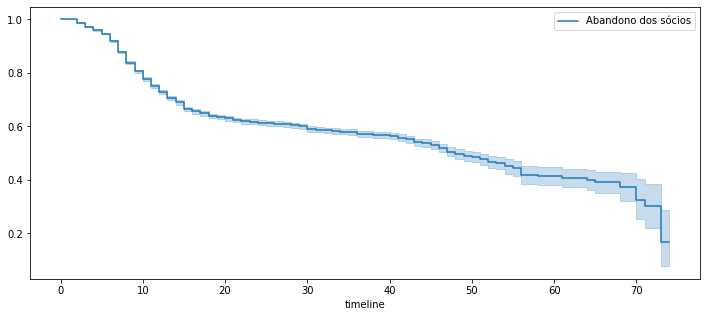

In [45]:
plt.rcParams['figure.figsize'] = [12, 5]

kmf.plot();

## Por género

M    17246
F     8070
Name: sexo, dtype: int64


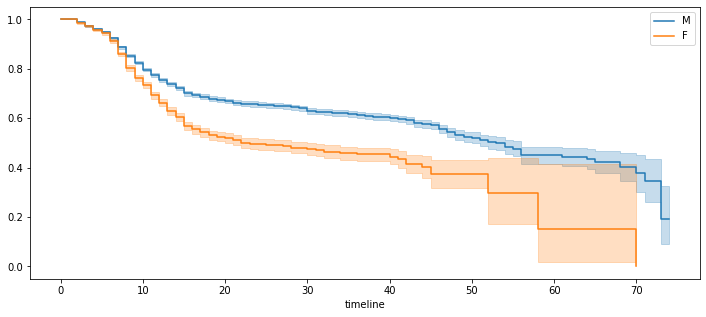

In [46]:
print(dfCurvas.sexo.value_counts())
curvaSobrevivencia(dfCurvas,'sexo')

In [47]:
results=multivariate_logrank_test(event_durations=T,groups=dfCurvas.sexo,event_observed=C)
results.print_summary()

In [48]:
results=pairwise_logrank_test(event_durations=T,groups=dfCurvas.sexo,event_observed=C)
results.print_summary()

## MesesUP

In [49]:
dfCurvas.mesesUP.describe()

count    25316.000000
mean        18.814110
std         32.498248
min          0.000000
25%          2.000000
50%          4.000000
75%         17.000000
max        156.000000
Name: mesesUP, dtype: float64

In [50]:
var='mesesUP'
varEscalao='escMesesUP'
dfCurvas[varEscalao]=''
for index, cliente in dfCurvas.iterrows():
    #se a variável tiver o valor 1 colocar na nova variável a descrição da atividade
    if cliente[var] <= 2: 
        dfCurvas.at[index,varEscalao]=var+' less than 2'
    elif (cliente[var] > 2) & (cliente[var] <= 4):
        dfCurvas.at[index,varEscalao]=var+' greather than 2 and less 4'
    elif (cliente[var] > 4) & (cliente[var] <= 17):
        dfCurvas.at[index,varEscalao]=var + ' greather than 4 and less 17'
    elif (cliente[var] > 17):
        dfCurvas.at[index,varEscalao]=var + ' greather than 17'

In [51]:
dfCurvas.escMesesUP.value_counts()

mesesUP less than 2                    8814
mesesUP greather than 17               6303
mesesUP greather than 4 and less 17    5246
mesesUP greather than 2 and less 4     4953
Name: escMesesUP, dtype: int64

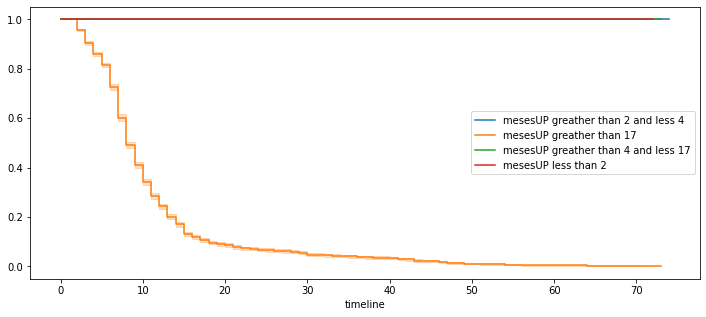

In [52]:
curvaSobrevivencia(dfCurvas,varEscalao)

In [53]:
results=multivariate_logrank_test(event_durations=T,groups=dfCurvas[varEscalao],event_observed=C)
results.print_summary()

In [54]:
results=pairwise_logrank_test(event_durations=T,groups=dfCurvas[varEscalao],event_observed=C)
results.print_summary()

## ValorTotal

In [55]:
dfCurvas.valorTotal.describe()

count    25316.000000
mean       316.037984
std        493.971528
min          0.000000
25%          5.000000
50%         53.000000
75%        448.250000
max       2602.000000
Name: valorTotal, dtype: float64

In [56]:
var='valorTotal'
varEscalao='escValorTotal'
dfCurvas[varEscalao]=''
for index, cliente in dfCurvas.iterrows():
    #se a variável tiver o valor 1 colocar na nova variável a descrição da atividade
    if cliente[var] <= 5: 
        dfCurvas.at[index,varEscalao]=var+' less than 5'
    elif (cliente[var] > 5) & (cliente[var] <= 53):
        dfCurvas.at[index,varEscalao]=var+' greather than 5 and less 53'
    elif (cliente[var] > 53) & (cliente[var] <= 448):
        dfCurvas.at[index,varEscalao]=var + ' greather than 53 and less 448'
    elif (cliente[var] > 448):
        dfCurvas.at[index,varEscalao]=var + ' greather than 448'

In [57]:
dfCurvas[varEscalao].value_counts()

valorTotal less than 5                      7060
valorTotal greather than 448                6329
valorTotal greather than 53 and less 448    6280
valorTotal greather than 5 and less 53      5647
Name: escValorTotal, dtype: int64

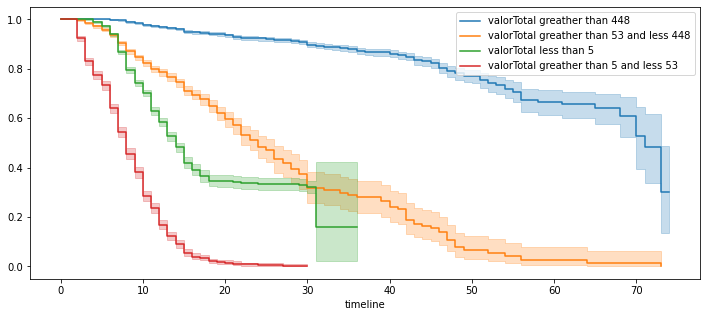

In [58]:
curvaSobrevivencia(dfCurvas,varEscalao)

In [59]:
results=multivariate_logrank_test(event_durations=T,groups=dfCurvas[varEscalao],event_observed=C)
results.print_summary()

In [60]:
results=pairwise_logrank_test(event_durations=T,groups=dfCurvas[varEscalao],event_observed=C)
results.print_summary()

## quotaMensal

In [61]:
varEscalao='quotaMensal'
dfCurvas[varEscalao].describe()

count    25316.000000
mean         4.356099
std          3.550837
min          0.000000
25%          1.000000
50%          2.500000
75%          6.000000
max         10.000000
Name: quotaMensal, dtype: float64

In [62]:
dfCurvas[varEscalao].value_counts()

1.0     8016
2.5     7168
10.0    6126
6.0     3123
5.0      869
0.0       14
Name: quotaMensal, dtype: int64

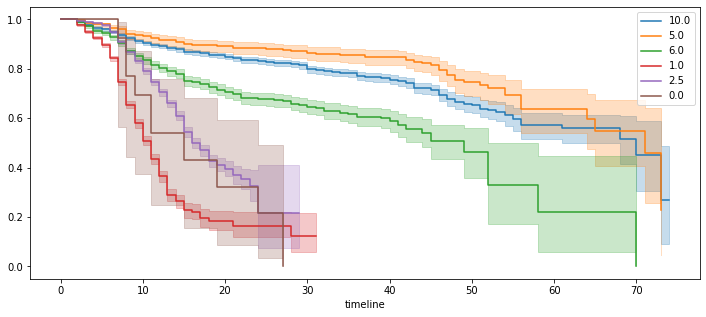

In [63]:
curvaSobrevivencia(dfCurvas,varEscalao)

In [64]:
results=multivariate_logrank_test(event_durations=T,groups=dfCurvas[varEscalao],event_observed=C)
results.print_summary()

In [65]:
results=pairwise_logrank_test(event_durations=T,groups=dfCurvas[varEscalao],event_observed=C)
results.print_summary()

## jogosEpoca

In [66]:
var='jogosEpoca'
varEscalao='escJogosEpoca'
dfCurvas[var].describe()

count    25316.000000
mean         2.171631
std          4.076356
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         16.000000
Name: jogosEpoca, dtype: float64

In [67]:
dfCurvas[varEscalao]=''
for index, cliente in dfCurvas.iterrows():
    #se a variável tiver o valor 1 colocar na nova variável a descrição da atividade
    if cliente[var] <= 2: 
        dfCurvas.at[index,varEscalao]=var+' less than 2'
    elif (cliente[var] > 2):
        dfCurvas.at[index,varEscalao]=var + ' greather than 2'

In [68]:
dfCurvas[varEscalao].value_counts()

jogosEpoca less than 2        19015
jogosEpoca greather than 2     6301
Name: escJogosEpoca, dtype: int64

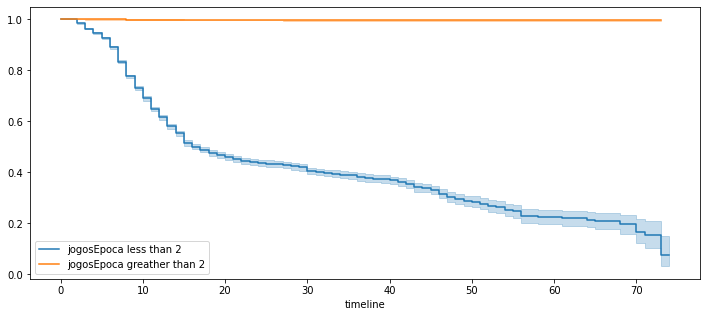

In [69]:
curvaSobrevivencia(dfCurvas,varEscalao)

In [70]:
results=multivariate_logrank_test(event_durations=T,groups=dfCurvas[varEscalao],event_observed=C)
results.print_summary()

In [71]:
results=pairwise_logrank_test(event_durations=T,groups=dfCurvas[varEscalao],event_observed=C)
results.print_summary()

## escalaoTotalJogos

In [72]:
var='escaloesTotalJogos'
dfCurvas[var].describe()

count     25316
unique        5
top       ate 1
freq      15155
Name: escaloesTotalJogos, dtype: object

In [73]:
dfCurvas[var].value_counts()

ate 1       15155
1 a 21       2627
mais 105     2527
56 a 105     2519
21 a 56      2488
Name: escaloesTotalJogos, dtype: int64

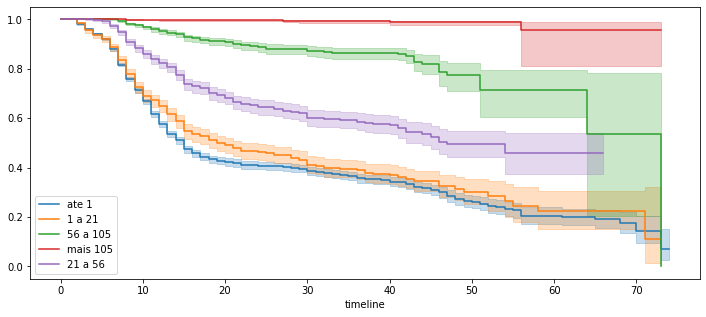

In [74]:
curvaSobrevivencia(dfCurvas,var)

In [75]:
results=multivariate_logrank_test(event_durations=T,groups=dfCurvas[var],event_observed=C)
results.print_summary()

In [76]:
results=pairwise_logrank_test(event_durations=T,groups=dfCurvas[var],event_observed=C)
results.print_summary()

## estadoCivil

In [77]:
var='estadoCivil'
dfCurvas[var].describe()

count        25316
unique           4
top       solteiro
freq         12065
Name: estadoCivil, dtype: object

In [78]:
dfCurvas[var].value_counts()

solteiro        12065
nao definido     7667
casado           5085
outro             499
Name: estadoCivil, dtype: int64

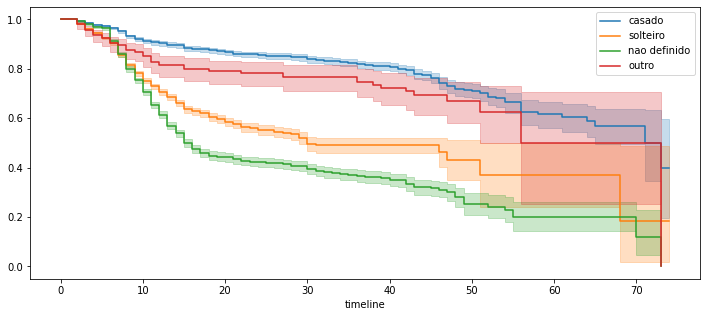

In [79]:
curvaSobrevivencia(dfCurvas,var)

In [80]:
results=multivariate_logrank_test(event_durations=T,groups=dfCurvas[var],event_observed=C)
results.print_summary

<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: multivariate_logrank_test>>

In [81]:
results=pairwise_logrank_test(event_durations=T,groups=dfCurvas[var],event_observed=C)
results.print_summary()